# Scikit-Learn Model Selection Patterns

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Make the model
pipeline = Pipeline([
    ('scale', None), 
    ('predict', None)
])

# Set up some parameters
params = [
    {
    'scale':[None, StandardScaler()],
    'predict': [LogisticRegression()],
    'predict__C': [0.1, 1, 10, 100, 1000]
    },
    {
    'scale':[None, StandardScaler()],
    'predict': [SVC()],
    'predict__C': [0.1, 1, 10, 100, 1000]
    }
]

gs = GridSearchCV(pipeline, params, scoring='accuracy', cv=StratifiedKFold(), return_train_score=True)
gs.fit(X, y)

res = pd.DataFrame(gs.cv_results_)
pd.options.display.max_colwidth=100
print(gs.best_estimator_)
res[['param_scale', 'param_predict', 'mean_test_score', 'std_test_score']]

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('predict', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


,param_scale,param_predict,mean_test_score,std_test_score
0,None,"LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.813333,0.037924
1,"StandardScaler(copy=True, with_mean=True, with_std=True)","LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.833333,0.053703
2,None,"LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.946667,0.018041
3,"StandardScaler(copy=True, with_mean=True, with_std=True)","LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.900000,0.016420
4,None,"LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.966667,0.033456
5,"StandardScaler(copy=True, with_mean=True, with_std=True)","LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.926667,0.017795
6,None,"LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.973333,0.037154
7,"StandardScaler(copy=True, with_mean=True, with_std=True)","LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.960000,0.027588
8,None,"LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.966667,0.046442
9,"StandardScaler(copy=True, with_mean=True, with_std=True)","LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,\n interce...",0.960000,0.027588


In [27]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
X = [['a'], ['b'], ['c']]

oh.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
import pandas as pd
X = ['a', 'b', 'c']
pd.get_dummies(X).values

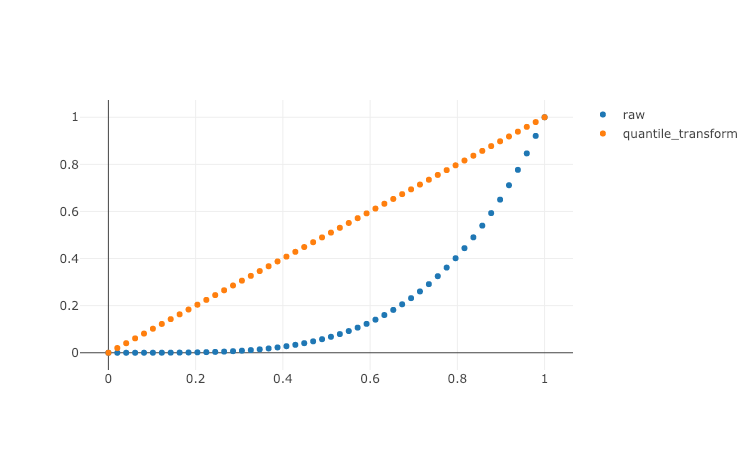

In [28]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
from sklearn.preprocessing import QuantileTransformer

x = np.linspace(0, 1, 50)

y = x**4

y_ = QuantileTransformer().fit_transform(y[:, None]).squeeze()

py.iplot([go.Scatter(x=x, y=y, name='raw', mode='markers'), 
          go.Scatter(x=x, y=y_, name='quantile_transform', mode='markers')])

In [15]:
y_.min(), y_.max()

(9.999999977795539e-08, 0.9999999000000003)